In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('/Users/amandagolubics/Programs/Python/lending-club-calcs/data/accepted_2007_to_2018Q4.csv', low_memory=False)

In [74]:
display(df.shape)
display(df.head())

(2260701, 151)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
print(df['loan_status'].unique())

['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default' nan
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [78]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df = df[df['issue_d'].dt.year >= 2007]

In [79]:
grouped = df.groupby(df['issue_d'].dt.year)
# # Iterate through the groups and display the data in each group
# for year, group_data in grouped:
#     print(f"Year: {year}")
#     print(group_data)  # This will print the data within the group for each year

In [80]:
total_loan_issued = grouped['loan_amnt'].sum()
# Calculate the total loan amount charged off or defaulted for each year
total_loan_charged_off = grouped.apply(lambda group: group[group['loan_status'].str.contains('Charged Off|Default', case=False)]['loan_amnt'].sum())

In [81]:
loss_rates = total_loan_charged_off / total_loan_issued

In [82]:
loss_rate_change = loss_rates.diff().fillna(0)

In [83]:
display(total_loan_issued.index.shape)
display(total_loan_issued.shape)
display(total_loan_charged_off.shape)
display(loss_rates.shape)
display(loss_rate_change.shape)

(12,)

(12,)

(12,)

(12,)

(12,)

In [84]:
print("Year\tTotal Loan Issued\tTotal Loss\tLoss Rate\tLoss Rate Change")
for year, issued, charged_off, rate, change in zip(total_loan_issued.index, total_loan_issued, total_loan_charged_off, loss_rates, loss_rate_change):
    print(f"{year}\t{issued:.2f}\t\t{charged_off:.2f}\t{rate * 100:.2f}%\t\t{change * 100:.2f}%")

Year	Total Loan Issued	Total Loss	Loss Rate	Loss Rate Change
2007	4977475.00		1552225.00	31.18%		0.00%
2008	21119250.00		4984450.00	23.60%		-7.58%
2009	51928250.00		7628075.00	14.69%		-8.91%
2010	131992550.00		18601150.00	14.09%		-0.60%
2011	261683825.00		43360600.00	16.57%		2.48%
2012	718411025.00		127242925.00	17.71%		1.14%
2013	1982765275.00		329869625.00	16.64%		-1.07%
2014	3503840175.00		641005375.00	18.29%		1.66%
2015	6417608175.00		1192132300.00	18.58%		0.28%
2016	6400569700.00		1051345600.00	16.43%		-2.15%
2017	6584957075.00		619117250.00	9.40%		-7.02%
2018	7936263150.00		151120400.00	1.90%		-7.50%


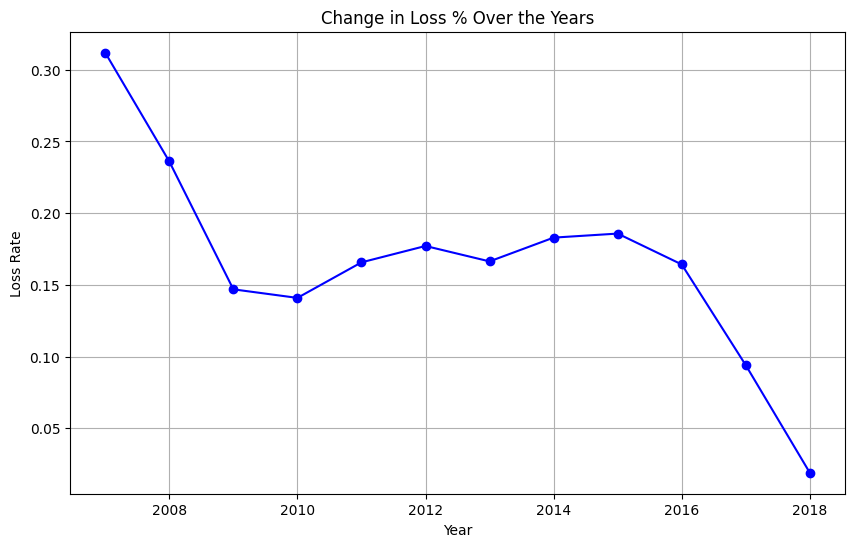

In [85]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(total_loan_issued.index, loss_rates, marker='o', linestyle='-', color='b')
plt.title('Change in Loss % Over the Years')
plt.xlabel('Year')
plt.ylabel('Loss Rate')
plt.grid(True)

# Display the plot
plt.show()

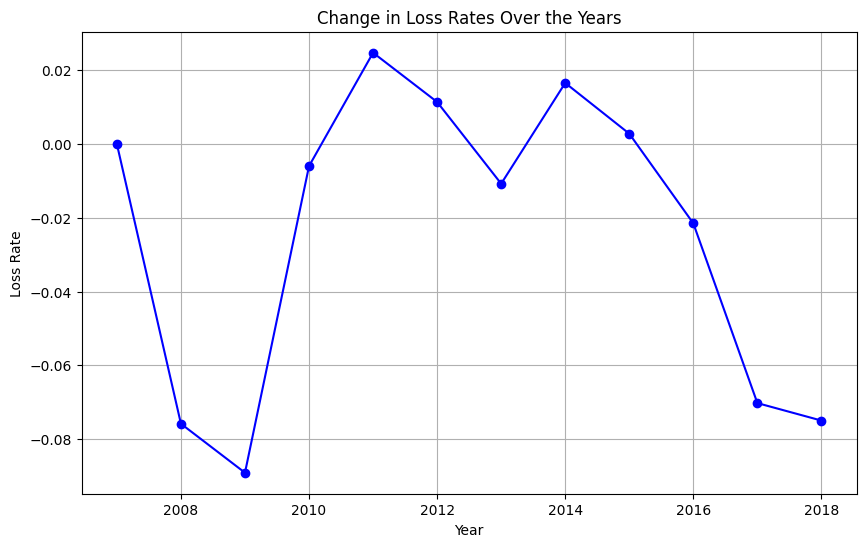

In [86]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(total_loan_issued.index, loss_rate_change, marker='o', linestyle='-', color='b')
plt.title('Change in Loss Rates Over the Years')
plt.xlabel('Year')
plt.ylabel('Loss Rate')
plt.grid(True)

# Display the plot
plt.show()

In [87]:
# Load the dataset
df = pd.read_csv('/Users/amandagolubics/Programs/Python/lending-club-calcs/data/accepted_2007_to_2018Q4.csv', low_memory=False)

In [88]:
# Convert 'issue_d' to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

# Filter data for loans issued from 2007 onwards
df = df[df['issue_d'].dt.year >= 2007]

# Define custom FICO score bins (in groups of 50 points)
fico_bins = range(600, 851, 50)

# Group by 'issue_d' (year) and custom FICO score bins
df['fico_range'] = pd.cut(df['fico_range_low'], bins=fico_bins)

grouped = df.groupby([df['issue_d'].dt.year, df['fico_range']])

# Calculate the total loan amount issued, charged off, and loss rates for each group
total_loan_issued = grouped['loan_amnt'].sum()
total_loan_charged_off = grouped.apply(lambda group: group[group['loan_status'].str.contains('Charged Off|Default', case=False)]['loan_amnt'].sum())
loss_rates = total_loan_charged_off / total_loan_issued

# Calculate the change in loss rates
loss_rate_change = loss_rates.groupby(level=0).diff().fillna(0)

# Print the results
print("Year\tFICO Range\tTotal Loan Issued\tTotal Loss\tLoss Rate\tLoss Rate Change")
for (year, fico_range), issued, charged_off, rate, change in zip(total_loan_issued.index, total_loan_issued, total_loan_charged_off, loss_rates, loss_rate_change):
    fico_start, fico_end = fico_range.left, fico_range.right
    print(f"{year}\t{fico_start}-{fico_end}\t{issued:.2f}\t\t{charged_off:.2f}\t{rate * 100:.2f}%\t\t{change * 100:.2f}%")

/var/folders/r1/pbnxfz596zv4hp8vrkqqzhbr0000gn/T/ipykernel_99309/2305013068.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([df['issue_d'].dt.year, df['fico_range']])


Year	FICO Range	Total Loan Issued	Total Loss	Loss Rate	Loss Rate Change
2007	600-650	916600.00		386450.00	42.16%		0.00%
2007	650-700	2395050.00		822250.00	34.33%		-7.83%
2007	700-750	1108400.00		254750.00	22.98%		-11.35%
2007	750-800	511575.00		88775.00	17.35%		-5.63%
2007	800-850	45850.00		0.00	0.00%		-17.35%
2008	600-650	1583900.00		453750.00	28.65%		0.00%
2008	650-700	10692400.00		2891375.00	27.04%		-1.61%
2008	700-750	6580000.00		1326425.00	20.16%		-6.88%
2008	750-800	2095850.00		312900.00	14.93%		-5.23%
2008	800-850	167100.00		0.00	0.00%		-14.93%
2009	600-650	0.00		3622250.00	nan%		0.00%
2009	650-700	20622975.00		3177825.00	17.56%		0.00%
2009	700-750	21964775.00		813600.00	14.47%		-3.10%
2009	750-800	8628300.00		14400.00	9.43%		-5.04%
2009	800-850	712200.00		10104175.00	2.02%		-7.41%
2010	600-650	0.00		6795825.00	nan%		0.00%
2010	650-700	53004975.00		1663650.00	19.06%		0.00%
2010	700-750	57423450.00		37500.00	11.83%		-7.23%
2010	750-800	20703350.00		21469675.00	8.04%		-3.80%
2010	

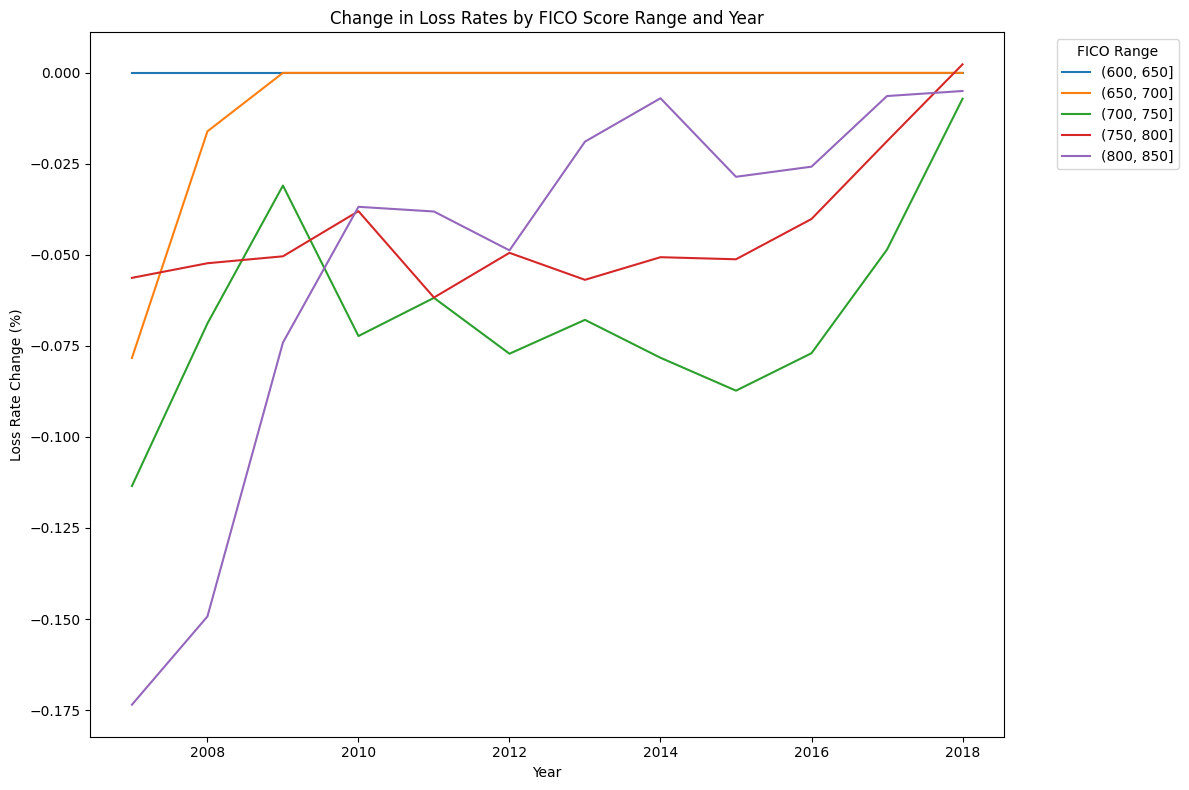

In [89]:
# Reshape the data for plotting
plot_data = loss_rate_change.unstack(level=1)

# Create a line plot
plot_data.plot(figsize=(12, 8), title='Change in Loss Rates by FICO Score Range and Year')
plt.xlabel('Year')
plt.ylabel('Loss Rate Change (%)')

# Display the legend
plt.legend(title='FICO Range', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()